## Load Data

In [92]:
airbnb_data <- read.csv("AirBnB.csv", header = T, na.strings = "") # set "" to NA
airbnb_data

host_id,host_name,host_since_year,host_since_anniversary,Customer.Since,Age.in.years,id,neighbourhood_cleansed,city,city_translated,⋯,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1662,Chloe,2008,8/11,8/11/08,8.93,304958,Westerpark,Amsterdam,Amsterdam,⋯,within a day,0.8,11,98,10,10,9,10,10,10
3159,Daniel,2008,9/24,9/24/08,8.80,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,Amsterdam,⋯,within an hour,1,108,97,10,10,10,10,9,10
3718,Britta,2008,10/19,10/19/08,8.74,103026,De Baarsjes - Oud-West,Amsterdam,Amsterdam,⋯,within a few hours,1,15,92,9,9,10,10,9,9
4716,Stefan,2008,11/30,11/30/08,8.62,550017,Centrum-Oost,Amsterdam,Amsterdam,⋯,within a day,1,20,97,10,10,10,10,10,10
5271,Tyler,2008,12/17,12/17/08,8.57,4728389,Centrum-West,Amsterdam,Amsterdam,⋯,within a day,0.89,1,100,8,10,8,10,10,6
5271,Tyler,2008,12/17,12/17/08,8.57,5500954,Centrum-West,Amsterdam,Amsterdam,⋯,within a day,0.9,0,NA,NA,NA,NA,NA,NA,NA
5271,Tyler,2008,12/17,12/17/08,8.57,5181918,Centrum-West,Amsterdam,Amsterdam,⋯,within a day,0.89,4,95,9,9,9,10,10,9
5988,Ramona,2009,1/4,1/4/09,8.53,2774924,Zuid,Amsterdam,Amsterdam,⋯,within an hour,1,33,95,9,10,10,10,10,9
9616,Laura,2009,3/9,3/9/09,8.35,23651,De Pijp - Rivierenbuurt,Amsterdam,Amsterdam,⋯,within a day,1,36,96,9,10,10,10,9,9


In [93]:
colnames(airbnb_data)

[1] "host_id"                                       
 [2] "host_name"                                     
 [3] "host_since_year"                               
 [4] "host_since_anniversary"                        
 [5] "Customer.Since"                                
 [6] "Age.in.years"                                  
 [7] "id"                                            
 [8] "neighbourhood_cleansed"                        
 [9] "city"                                          
[10] "city_translated"                               
[11] "state"                                         
[12] "state_translated"                              
[13] "zipcode"                                       
[14] "country"                                       
[15] "latitude"                                      
[16] "longitude"                                     
[17] "property_type"                                 
[18] "room_type"                                     
[19] "accommodates"                                  
[20] "bathrooms"                                     
[21] "bedrooms"                                      
[22] "beds"                                          
[23] "bed_type"                                      
[24] "price"                                         
[25] "guests_included"                               
[26] "extra_people"                                  
[27] "minimum_nights"                                
[28] "customers...50..review.rate"                   
[29] "X.Daily.Rev.per.2.guests..unless.limited.to.1."
[30] "Min.Nights"                                    
[31] "Total.Rev"                                     
[32] "host_response_time"                            
[33] "host_response_rate"                            
[34] "number_of_reviews"                             
[35] "review_scores_rating"                          
[36] "review_scores_accuracy"                        
[37] "review_scores_cleanliness"                     
[38] "review_scores_checkin"                         
[39] "review_scores_communication"                   
[40] "review_scores_location"                        
[41] "review_scores_value"

## Clean Data

#### Get corresponding response and predictor columns

In [94]:
# need to replace categorical data with indicator functions
# property_apmt = 1 if "Apartment", else = 0
# property_house = 1 if "House", else = 0
# if both property_apmt and property_house are 0, then property is "Boat"
airbnb_data$property_apmt <- ifelse(airbnb_data$property_type=="Apartment", "1", "0")
airbnb_data$property_house <- ifelse(airbnb_data$property_type=="House", "1", "0")
# room_type = 0 if "Private room", =1 if "Entire home/apt"
airbnb_data$room_type <- ifelse(airbnb_data$room_type == "Entire home/apt", "1", "0")

In [95]:
new_data <- subset(as.data.frame(airbnb_data), 
                   select = c(price, review_scores_rating, minimum_nights, property_apmt, 
                              property_house, room_type, accommodates))

In [96]:
head(new_data)
dim(new_data)

,price,review_scores_rating,minimum_nights,property_apmt,property_house,room_type,accommodates
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,$130,98,4,1,0,1,4
2,$59,97,3,1,0,0,2
3,$95,92,3,1,0,1,4
4,$100,97,2,1,0,1,2
5,$250,100,2,1,0,1,6
6,$140,NA,2,1,0,0,4


[1] 7833    7

#### Remove rows that contains NA

In [97]:
# Remove rows with NA values
clean_data <- na.omit(new_data)

In [98]:
head(clean_data)
dim(clean_data)

,price,review_scores_rating,minimum_nights,property_apmt,property_house,room_type,accommodates
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,$130,98,4,1,0,1,4
2,$59,97,3,1,0,0,2
3,$95,92,3,1,0,1,4
4,$100,97,2,1,0,1,2
5,$250,100,2,1,0,1,6
7,$115,95,1,1,0,0,2


[1] 6121    7

#### Check if there are still any empty entries

In [99]:
has_empty_entries <- sum(is.na(clean_data)) > 0
has_empty_entries

[1] FALSE

#### Remove duplicates

In [100]:
unique(clean_data)

,price,review_scores_rating,minimum_nights,property_apmt,property_house,room_type,accommodates
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,$130,98,4,1,0,1,4
2,$59,97,3,1,0,0,2
3,$95,92,3,1,0,1,4
4,$100,97,2,1,0,1,2
5,$250,100,2,1,0,1,6
7,$115,95,1,1,0,0,2
8,$80,95,3,0,1,0,2
9,$80,96,6,1,0,0,3
10,$90,93,3,0,1,1,2


In [101]:
install.packages("dplyr")

library(dplyr)

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)



In [102]:
new_clean_data <- clean_data %>% distinct() # remove duplicate rows and only keep the distinct rows
dim(new_clean_data)

[1] 4652    7

#### Get data summary

In [103]:
summary(new_clean_data)

    price           review_scores_rating minimum_nights   property_apmt     
 Length:4652        Min.   : 20.00       Min.   : 1.000   Length:4652       
 Class :character   1st Qu.: 90.00       1st Qu.: 2.000   Class :character  
 Mode  :character   Median : 94.00       Median : 2.000   Mode  :character  
                    Mean   : 92.51       Mean   : 2.565                     
                    3rd Qu.: 98.00       3rd Qu.: 3.000                     
                    Max.   :100.00       Max.   :27.000                     
 property_house      room_type          accommodates   
 Length:4652        Length:4652        Min.   : 1.000  
 Class :character   Class :character   1st Qu.: 2.000  
 Mode  :character   Mode  :character   Median : 3.000  
                                       Mean   : 3.281  
                                       3rd Qu.: 4.000  
                                       Max.   :16.000  

#### Convert random variables to appropriate data types

In [104]:
columns_to_convert <- c("price", "room_type", "property_apmt", "property_house")

for (col_name in columns_to_convert) {
  new_clean_data[, col_name] <- as.numeric(gsub("[^0-9.]", "", new_clean_data[, col_name]))
}

In [105]:
# check summary again after conversion
summary(new_clean_data)
attach(new_clean_data)

     price        review_scores_rating minimum_nights   property_apmt   
 Min.   :  15.0   Min.   : 20.00       Min.   : 1.000   Min.   :0.0000  
 1st Qu.:  80.0   1st Qu.: 90.00       1st Qu.: 2.000   1st Qu.:1.0000  
 Median : 107.5   Median : 94.00       Median : 2.000   Median :1.0000  
 Mean   : 127.7   Mean   : 92.51       Mean   : 2.565   Mean   :0.7644  
 3rd Qu.: 150.0   3rd Qu.: 98.00       3rd Qu.: 3.000   3rd Qu.:1.0000  
 Max.   :1400.0   Max.   :100.00       Max.   :27.000   Max.   :1.0000  
 property_house     room_type       accommodates   
 Min.   :0.0000   Min.   :0.0000   Min.   : 1.000  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.: 2.000  
 Median :0.0000   Median :1.0000   Median : 3.000  
 Mean   :0.1043   Mean   :0.7818   Mean   : 3.281  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.: 4.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :16.000  

The following objects are masked from new_clean_data (pos = 3):

    accommodates, minimum_nights, price, property_apmt, property_house,
    review_scores_rating, room_type


The following objects are masked from new_clean_data (pos = 4):

    accommodates, minimum_nights, price, property_apmt, property_house,
    review_scores_rating, room_type


The following objects are masked from data:

    accommodates, minimum_nights, review_scores_rating, room_type




### Fit Model (Preliminary)

#### Model 

In [106]:
model1 <- lm(price ~ review_scores_rating + minimum_nights + property_apmt + property_house + room_type + accommodates)
summary(model1)
e_hat <- resid(model1)
y_hat <- fitted(model1)


Call:
lm(formula = price ~ review_scores_rating + minimum_nights + 
    property_apmt + property_house + room_type + accommodates)

Residuals:
    Min      1Q  Median      3Q     Max 
-381.26  -31.75   -7.02   22.66  972.66 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -33.1971    10.8735  -3.053  0.00228 ** 
review_scores_rating   0.6626     0.1139   5.818 6.36e-09 ***
minimum_nights         0.4797     0.4903   0.978  0.32791    
property_apmt        -11.4788     2.7804  -4.129 3.71e-05 ***
property_house         7.7338     3.7237   2.077  0.03786 *  
room_type             42.8440     2.3802  18.000  < 2e-16 ***
accommodates          22.1947     0.5083  43.667  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 60.87 on 4645 degrees of freedom
Multiple R-squared:  0.4122,	Adjusted R-squared:  0.4115 
F-statistic: 542.9 on 6 and 4645 DF,  p-value: < 2.2e-16


#### Checking MLR assumptions

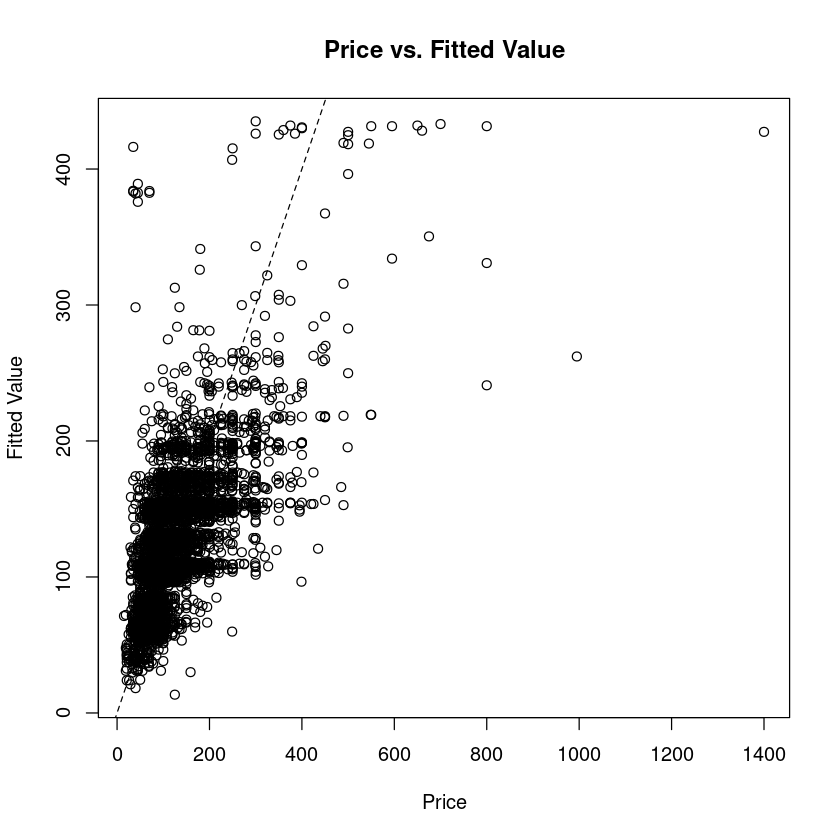

In [107]:
# 1. Conditional mean response
plot(y_hat ~ price, main="Price vs. Fitted Value", ylab="Fitted Value", xlab="Price")
abline(a=0, b=1, lty=2)

Observations: Points are along the diagonal, with scatter. However, it can be seen that there is fanning, so there is possibly a violation of constant variance. There is also clustering of points near the lower left of the plot.

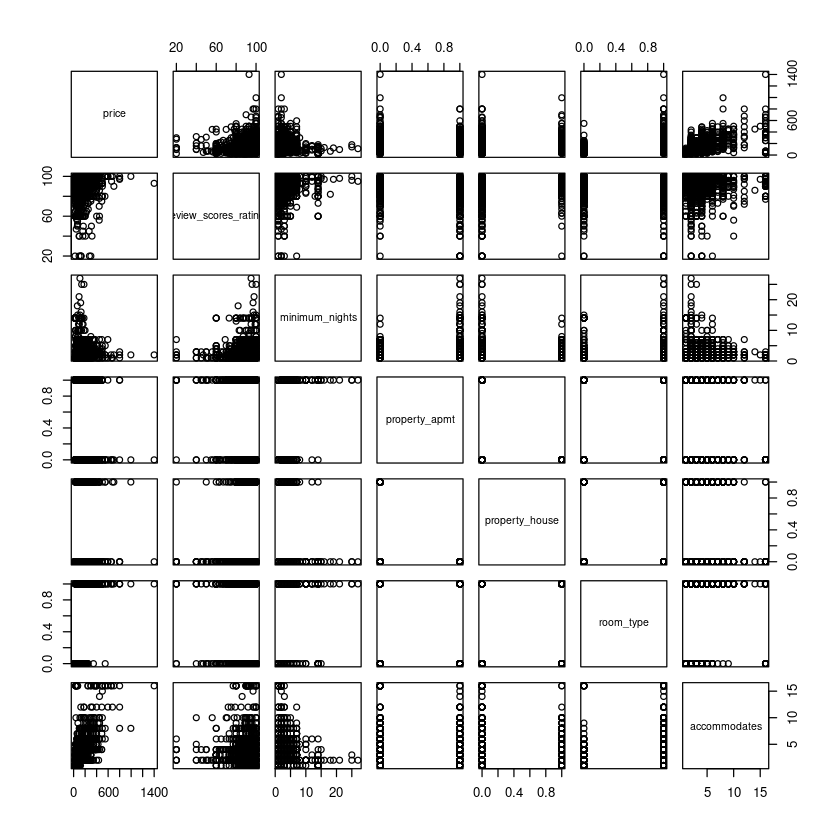

In [108]:
# 2. Conditional mean predictors
pairs(new_clean_data)

Observations: Points are either in lines (which is good), or in weird clusters. Transformations may be good.

#### Residual Plots

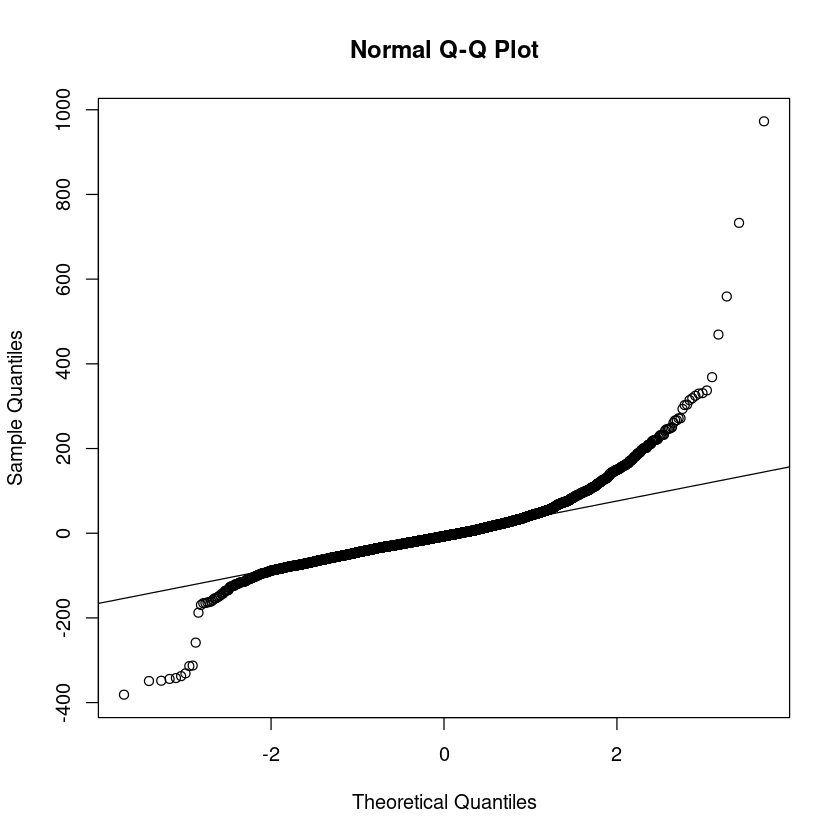

In [109]:
# Checking for normality
qqnorm(e_hat)
qqline(e_hat)

Observations: Normality seems to be relatively good, although there is still room for improvement.

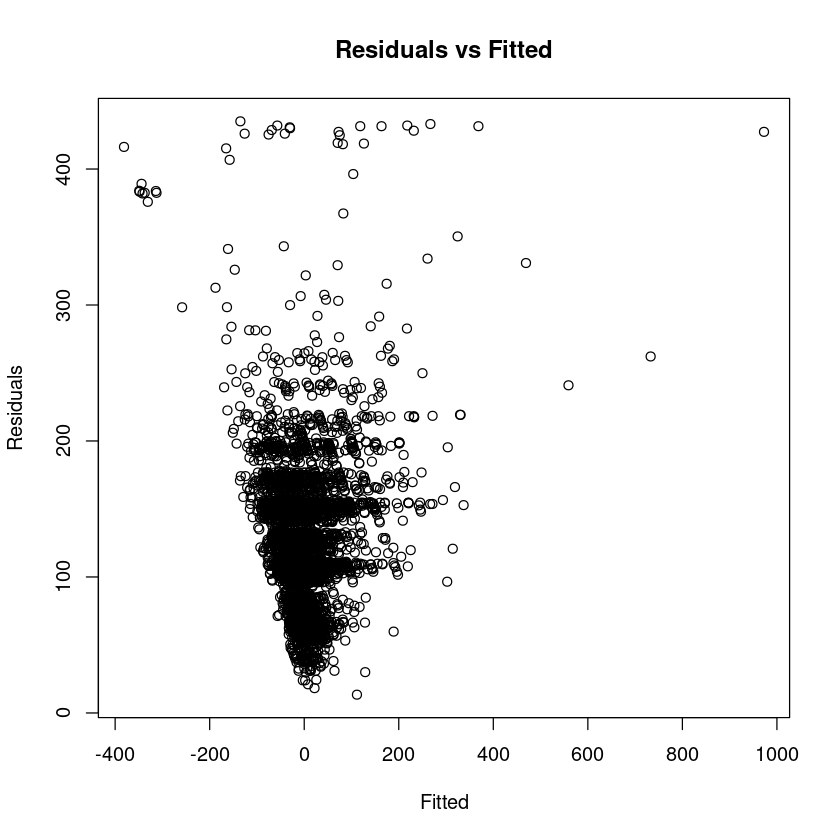

In [110]:
# Residual vs. fitted
plot(e_hat, y_hat, main="Residuals vs Fitted", ylab="Residuals", xlab="Fitted")

Observations: There is a skew in the plot and a fanning pattern, suggesting violation of constant variance and uncorrelated errors. However, this does not indicate whether these are the actual violations, because this is a multiple variable linear regression.

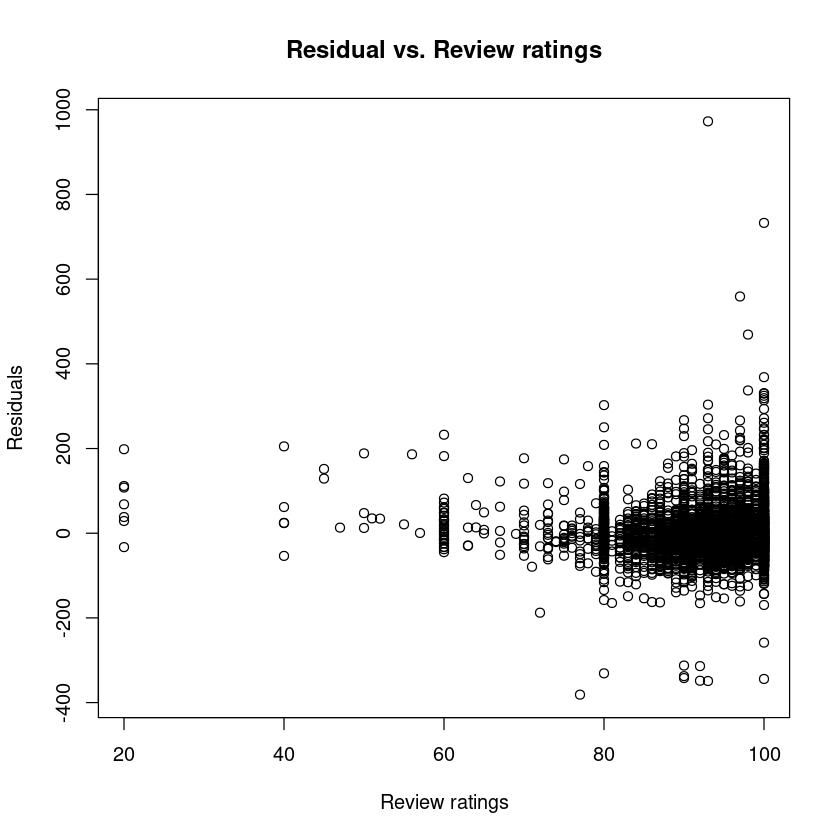

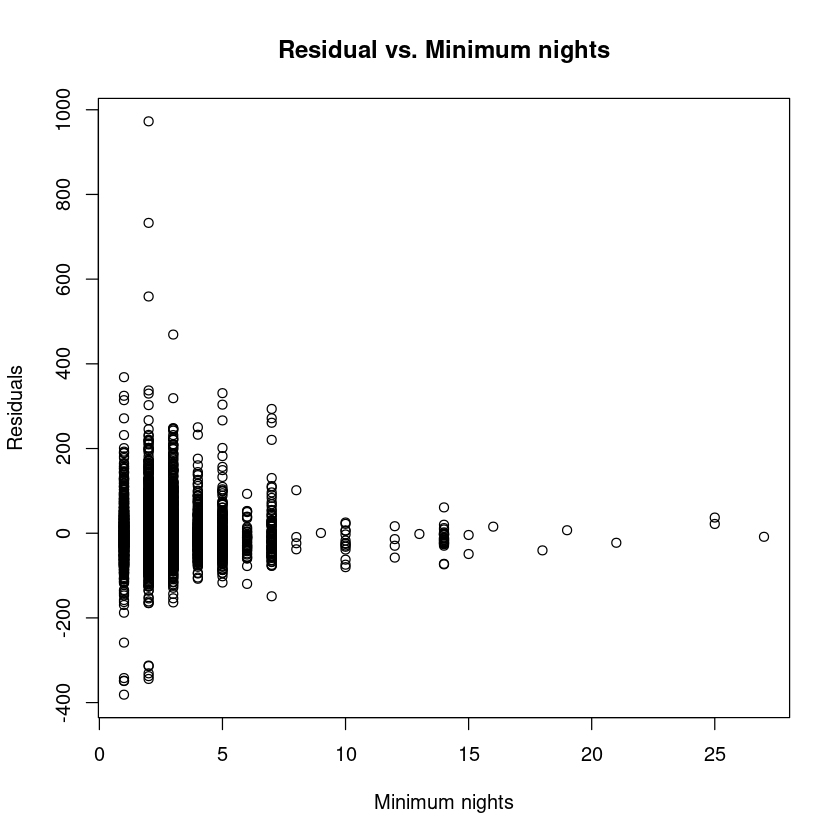

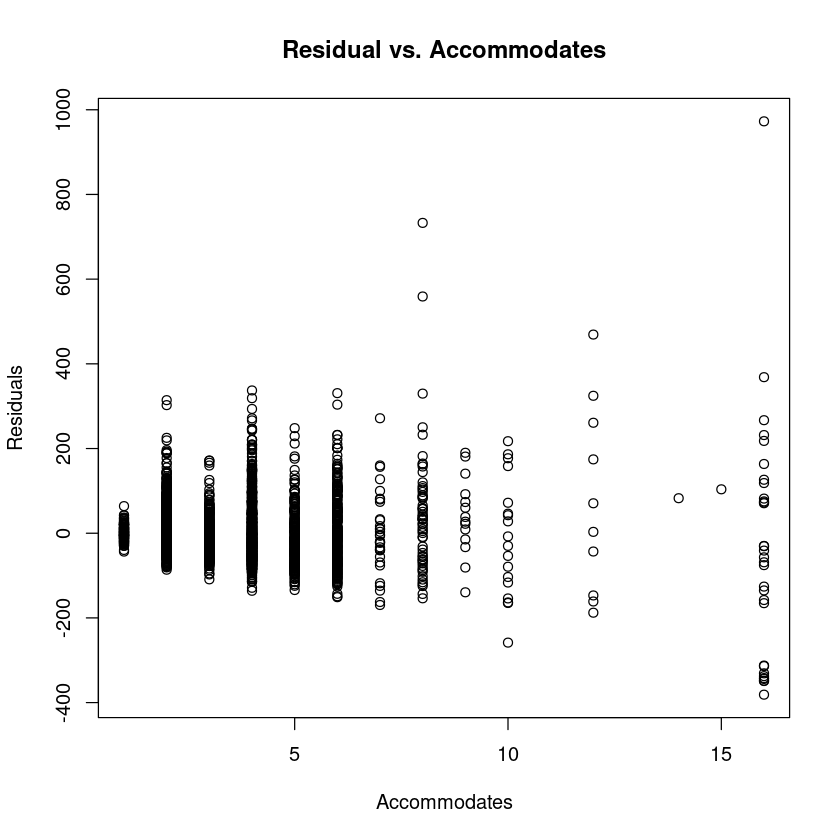

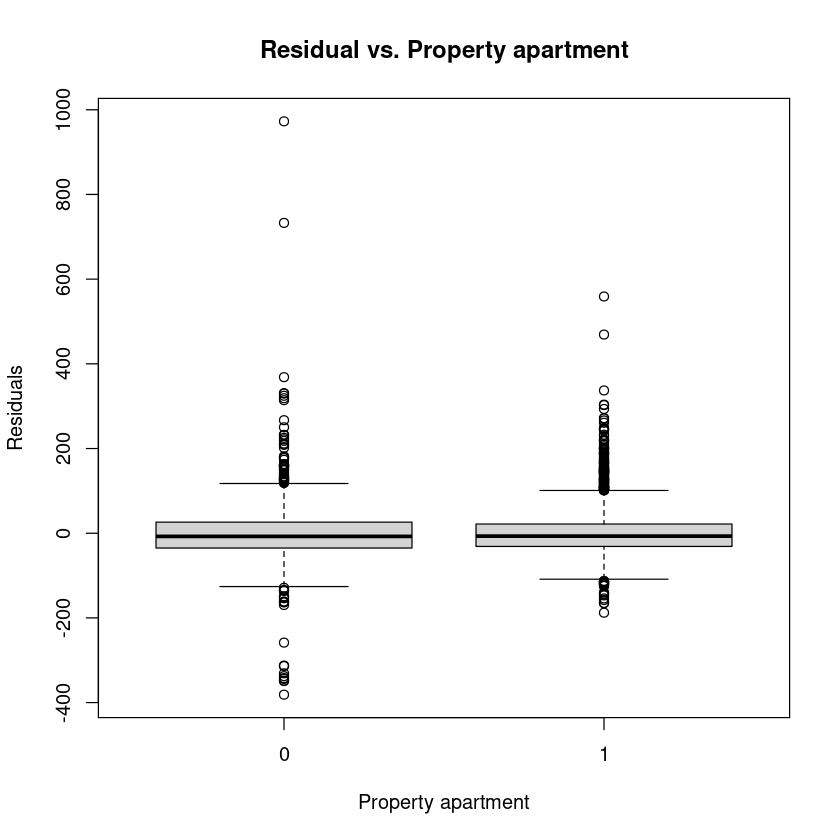

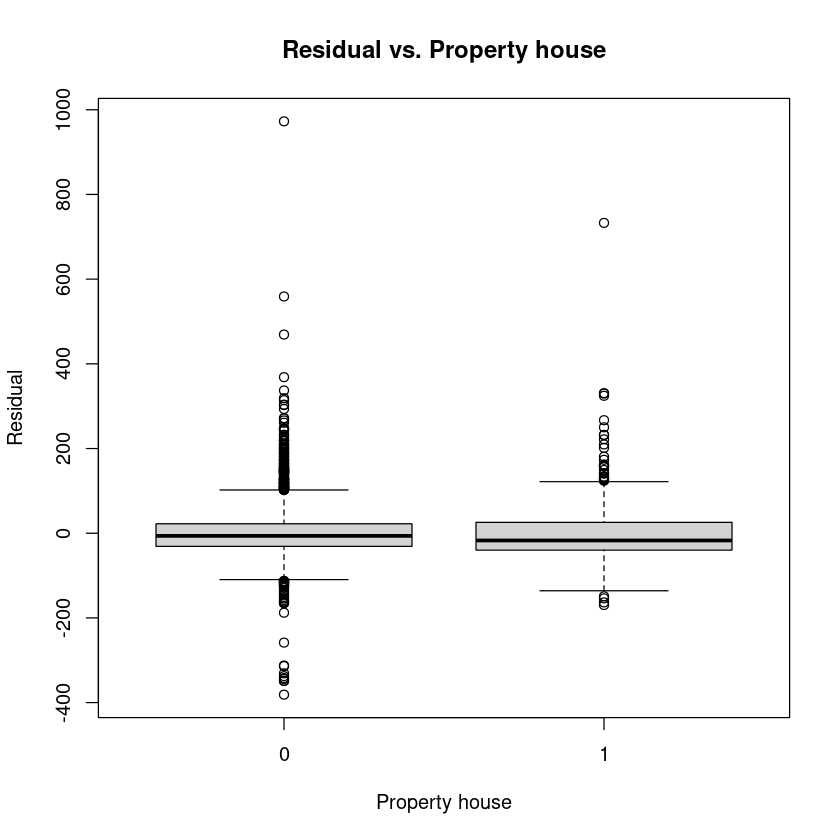

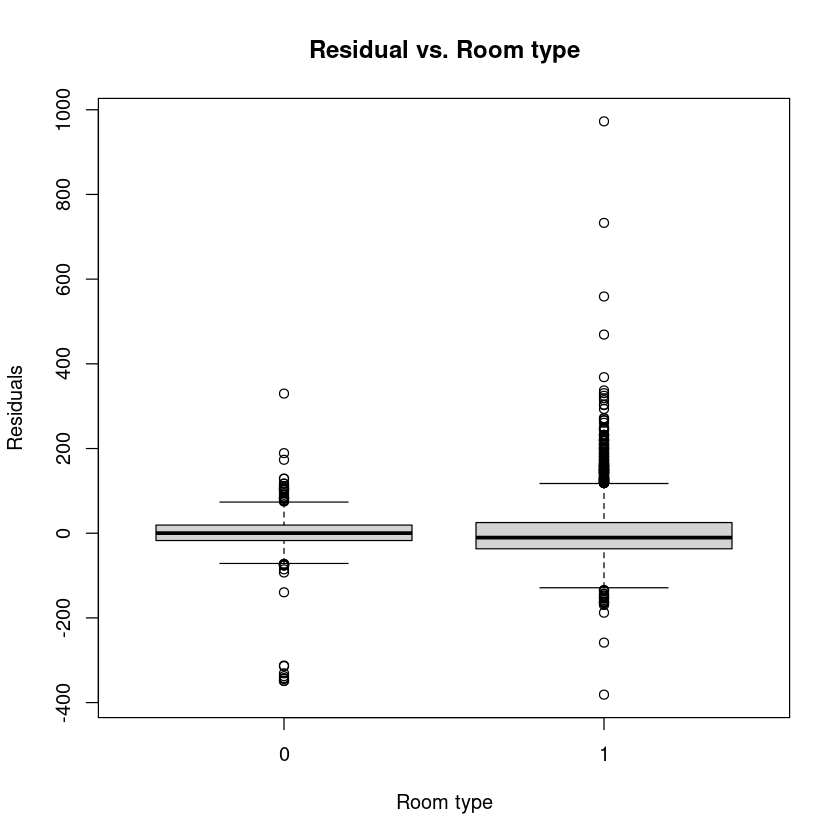

In [111]:
# Scatterplots
# Residual vs. Review ratings
plot(x=review_scores_rating, y=e_hat, main="Residual vs. Review ratings", ylab="Residuals", xlab="Review ratings")

# Residual vs. Minimum nights
plot(x=minimum_nights, y=e_hat, main="Residual vs. Minimum nights", ylab="Residuals", xlab="Minimum nights")

# Residual vs. Accommodates
plot(x=accommodates, y=e_hat, main="Residual vs. Accommodates", ylab="Residuals", xlab="Accommodates")

# Boxplots
# Residual vs. Property apartment
boxplot(e_hat ~ property_apmt , main="Residual vs. Property apartment", ylab="Residuals", xlab="Property apartment")

# Residual vs. Property house
boxplot(e_hat ~ property_house, main="Residual vs. Property house", ylab="Residual", xlab="Property house")

# Residual vs. Room type
boxplot(e_hat ~ room_type, main="Residual vs. Room type", ylab="Residuals", xlab="Room type")

Observations: There seems to be a skew and fanning pattern for the plots for the continuous predictor variables. These all suggest violation of constant variance and uncorrelated errors. However, this does not indicate whether these are the actual violations, because this is a multiple variable linear regression.

#### Histogram of the price data to check for skew

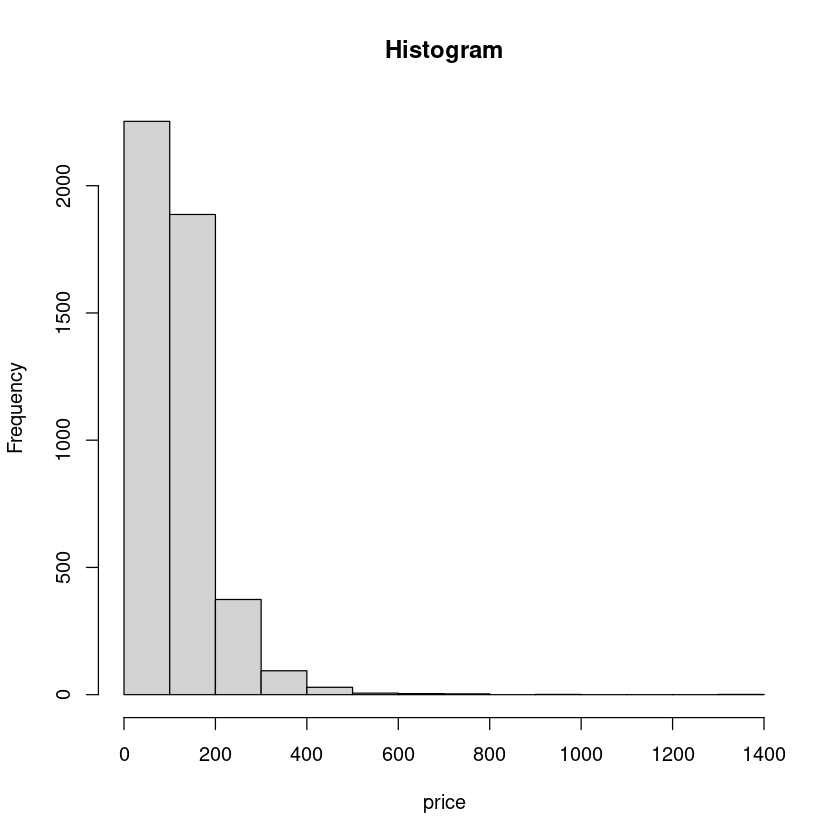

In [112]:
hist(new_clean_data$price, main="Histogram", xlab="price")

From the histogram above, the response is a right skewed, convert it to normal.

#### Convert the data so that it has a normal price distribution.

In [113]:
install.packages("MASS")
library(MASS)

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)



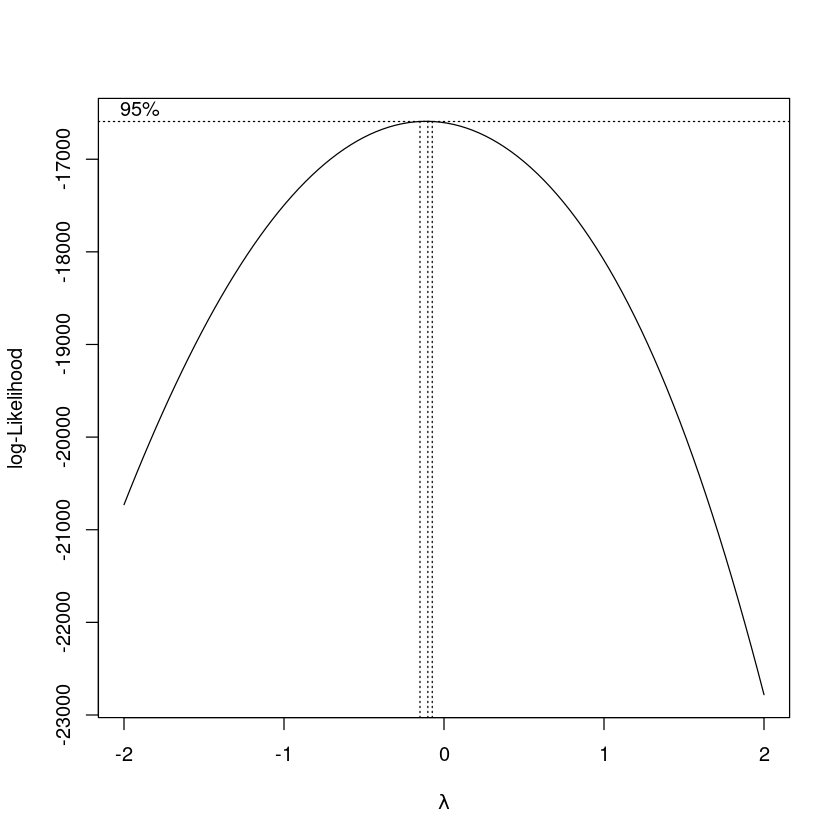

In [114]:
boxcox(lm(new_clean_data$price~1))

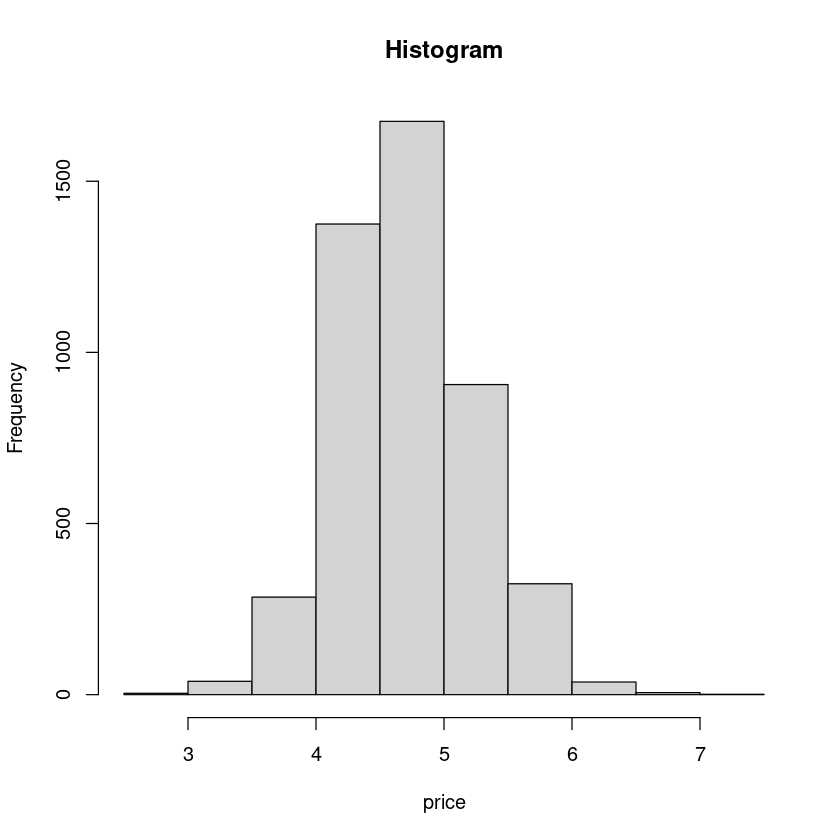

In [115]:
newprice <- log(new_clean_data$price)
hist(newprice, main="Histogram", xlab="price")

In [116]:
data <- data.frame(cbind(newprice, new_clean_data[,-1]))

In [117]:
head(data)
dim(data)

,newprice,review_scores_rating,minimum_nights,property_apmt,property_house,room_type,accommodates
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,4.867534,98,4,1,0,1,4
2,4.077537,97,3,1,0,0,2
3,4.553877,92,3,1,0,1,4
4,4.605170,97,2,1,0,1,2
5,5.521461,100,2,1,0,1,6
6,4.744932,95,1,1,0,0,2


[1] 4652    7

In [118]:
summary(data)

    newprice     review_scores_rating minimum_nights   property_apmt   
 Min.   :2.708   Min.   : 20.00       Min.   : 1.000   Min.   :0.0000  
 1st Qu.:4.382   1st Qu.: 90.00       1st Qu.: 2.000   1st Qu.:1.0000  
 Median :4.677   Median : 94.00       Median : 2.000   Median :1.0000  
 Mean   :4.707   Mean   : 92.51       Mean   : 2.565   Mean   :0.7644  
 3rd Qu.:5.011   3rd Qu.: 98.00       3rd Qu.: 3.000   3rd Qu.:1.0000  
 Max.   :7.244   Max.   :100.00       Max.   :27.000   Max.   :1.0000  
 property_house     room_type       accommodates   
 Min.   :0.0000   Min.   :0.0000   Min.   : 1.000  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.: 2.000  
 Median :0.0000   Median :1.0000   Median : 3.000  
 Mean   :0.1043   Mean   :0.7818   Mean   : 3.281  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.: 4.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :16.000  

### Fit Model (After Boxcox Transformation)

In [119]:
attach(data)

The following object is masked _by_ .GlobalEnv:

    newprice


The following objects are masked from new_clean_data (pos = 3):

    accommodates, minimum_nights, property_apmt, property_house,
    review_scores_rating, room_type


The following objects are masked from new_clean_data (pos = 4):

    accommodates, minimum_nights, property_apmt, property_house,
    review_scores_rating, room_type


The following objects are masked from new_clean_data (pos = 5):

    accommodates, minimum_nights, property_apmt, property_house,
    review_scores_rating, room_type


The following objects are masked from data (pos = 6):

    accommodates, minimum_nights, newprice, review_scores_rating,
    room_type




In [120]:
model2 <- lm(newprice ~ review_scores_rating + minimum_nights + property_apmt + property_house + room_type + accommodates)
summary(model2)

e_hat2 <- resid(model2)
y_hat2 <- fitted(model2)


Call:
lm(formula = newprice ~ review_scores_rating + minimum_nights + 
    property_apmt + property_house + room_type + accommodates)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.66140 -0.25492 -0.00235  0.25011  1.41433 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.490065   0.070079  49.802  < 2e-16 ***
review_scores_rating  0.005776   0.000734   7.870 4.38e-15 ***
minimum_nights       -0.005299   0.003160  -1.677   0.0936 .  
property_apmt        -0.091476   0.017919  -5.105 3.44e-07 ***
property_house        0.032864   0.023999   1.369   0.1709    
room_type             0.509691   0.015340  33.226  < 2e-16 ***
accommodates          0.111095   0.003276  33.914  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3923 on 4645 degrees of freedom
Multiple R-squared:  0.4327,	Adjusted R-squared:  0.432 
F-statistic: 590.5 on 6 and 4645 DF,  p-value: < 2.2e-16


#### Checking MLR Assumptions

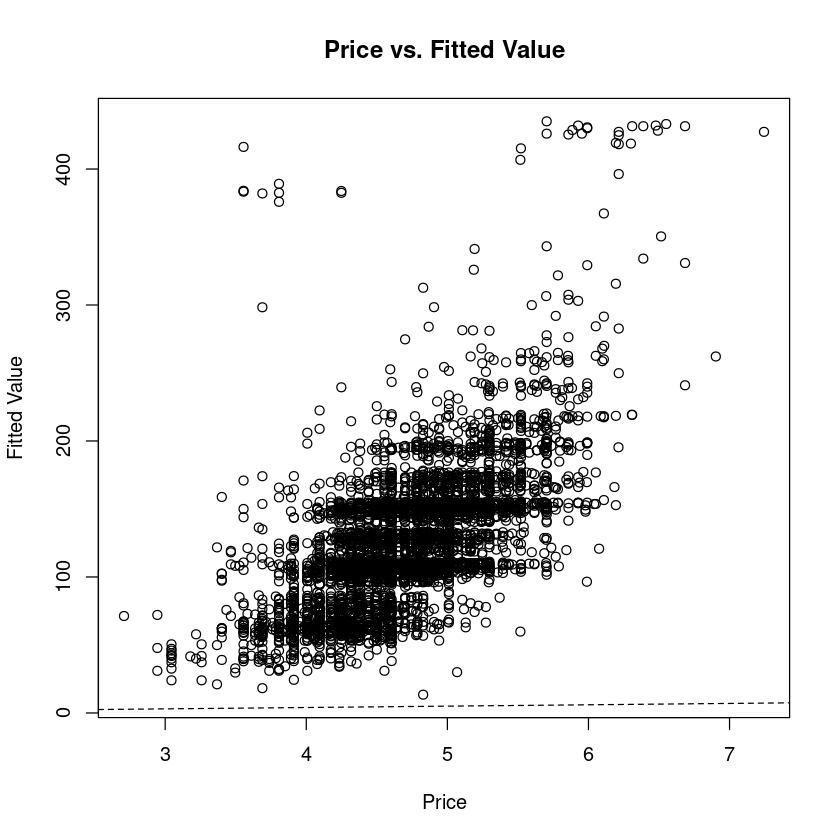

In [121]:
# 1. Conditional mean response
plot(y_hat ~ newprice, main="Price vs. Fitted Value", ylab="Fitted Value", xlab="Price")
abline(a=0, b=1, lty=2)

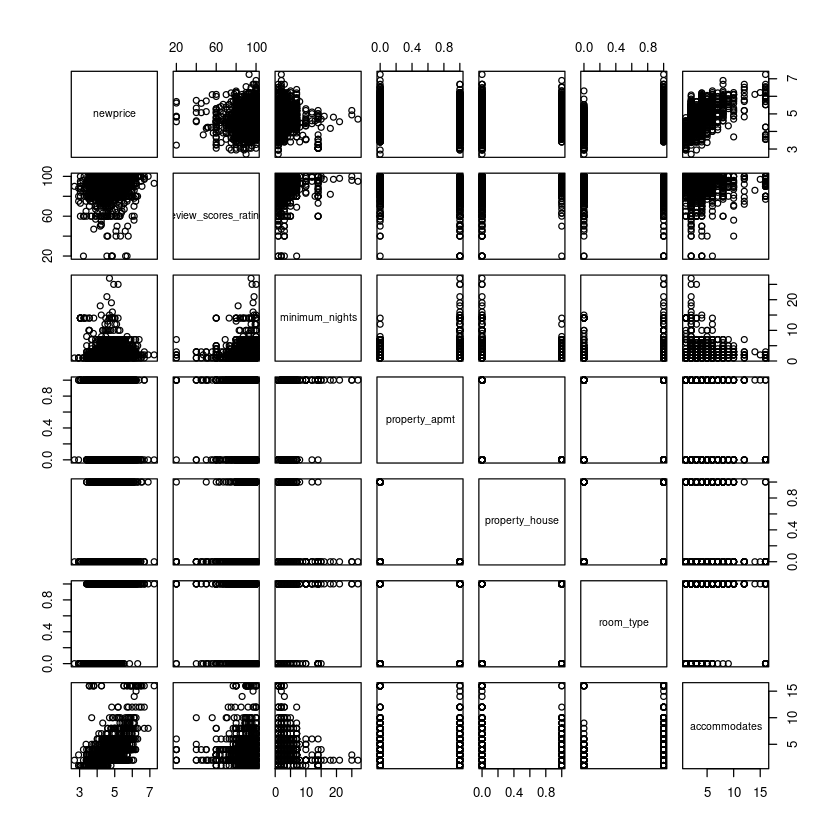

In [124]:
# 2. Conditional mean predictors
pairs(data)

#### Residual Plots

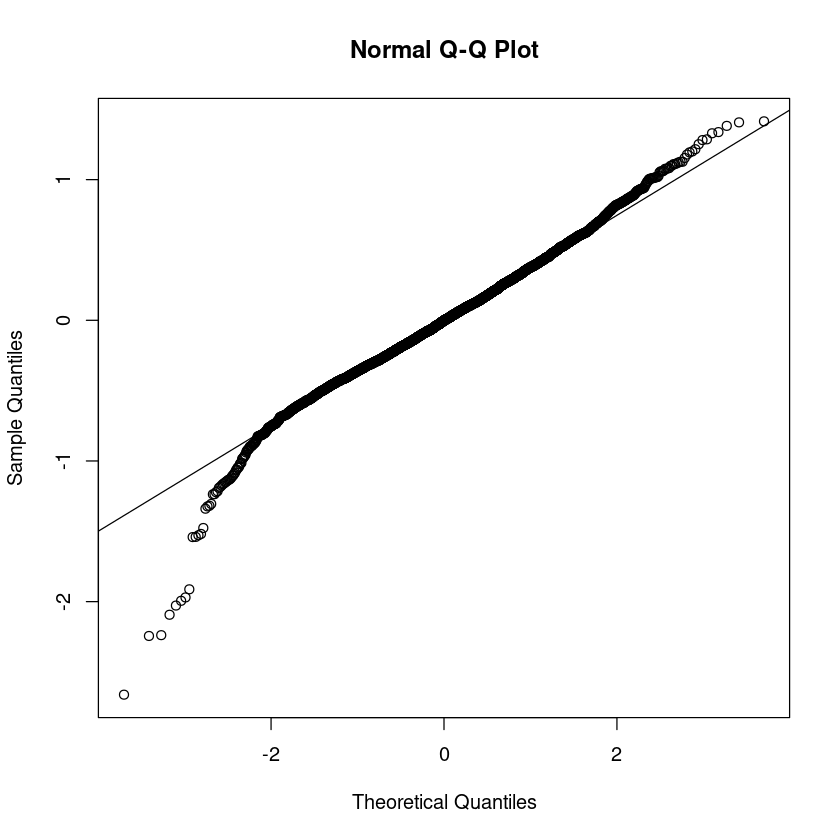

In [122]:
qqnorm(e_hat2)
qqline(e_hat2)

Observations: The normality plot seems much better than before the boxcox transformation

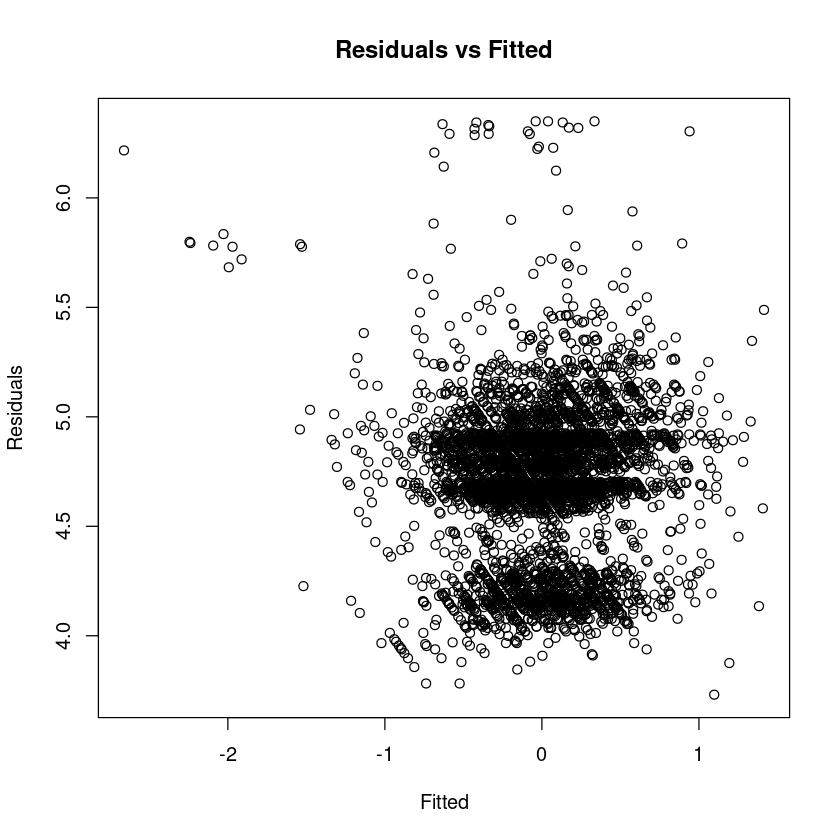

In [125]:
# Residual vs. fitted
plot(e_hat2, y_hat2, main="Residuals vs Fitted", ylab="Residuals", xlab="Fitted")

Observations: The fanning pattern seems to have been dealt with. However, now there seems to be some clustering, suggesting that there are still violations of assumptions.

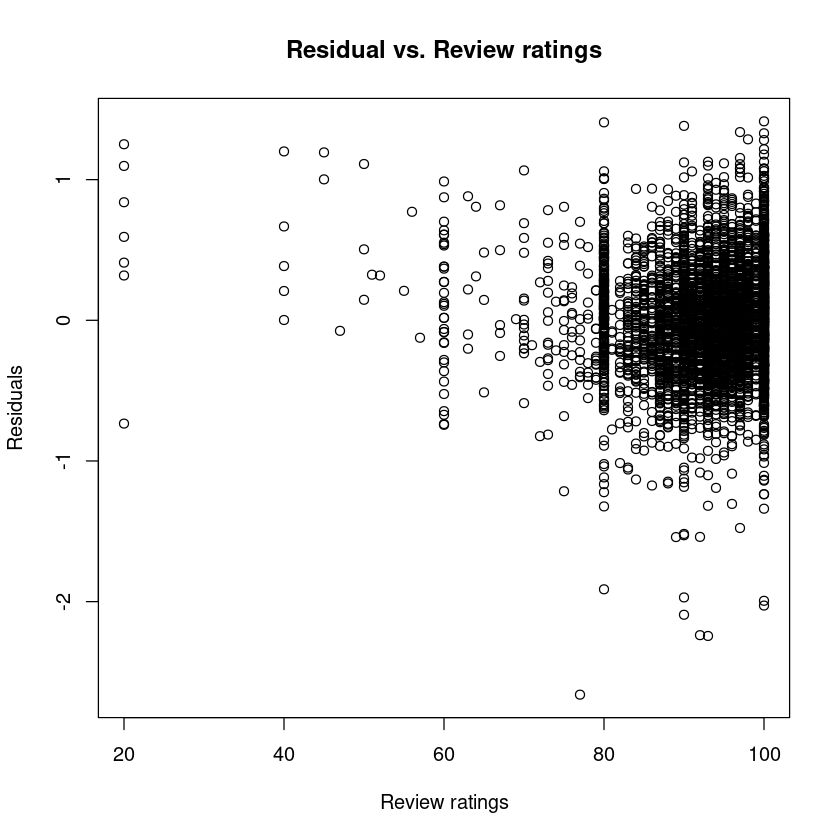

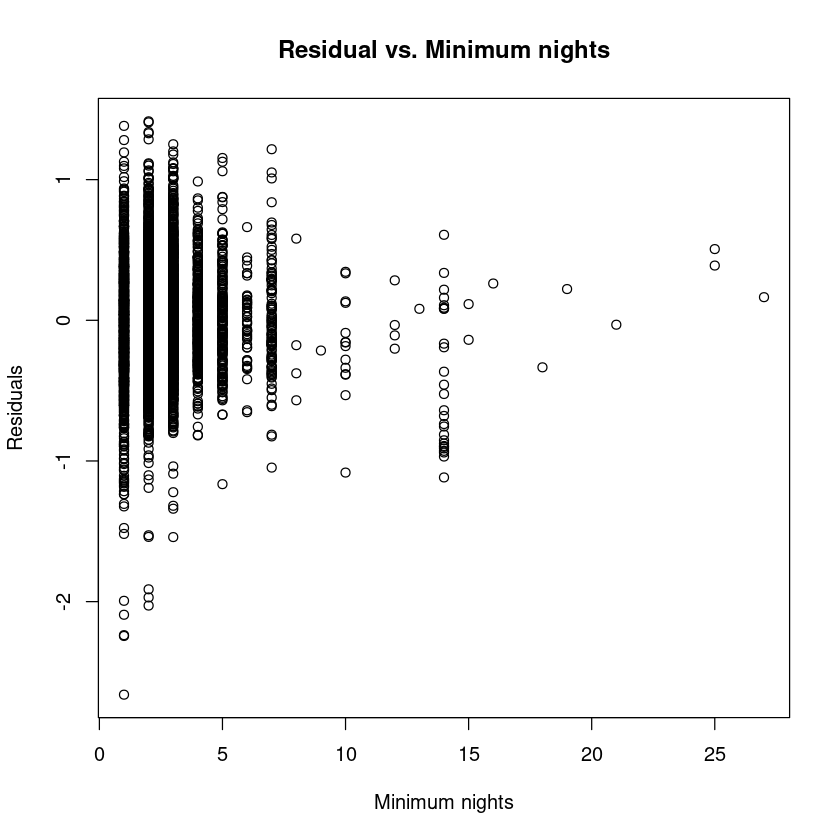

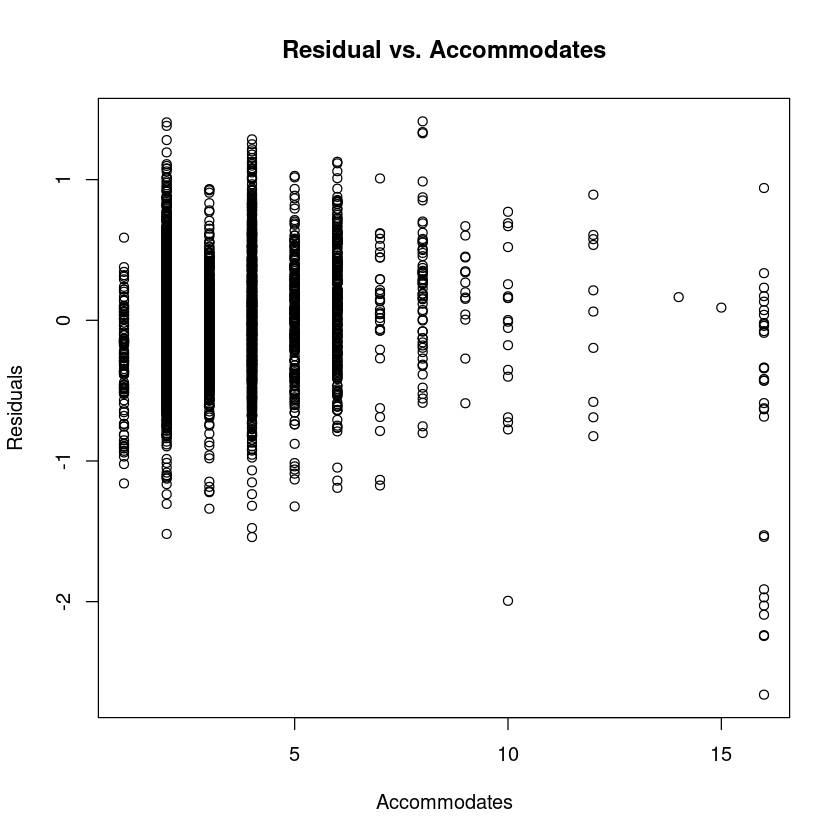

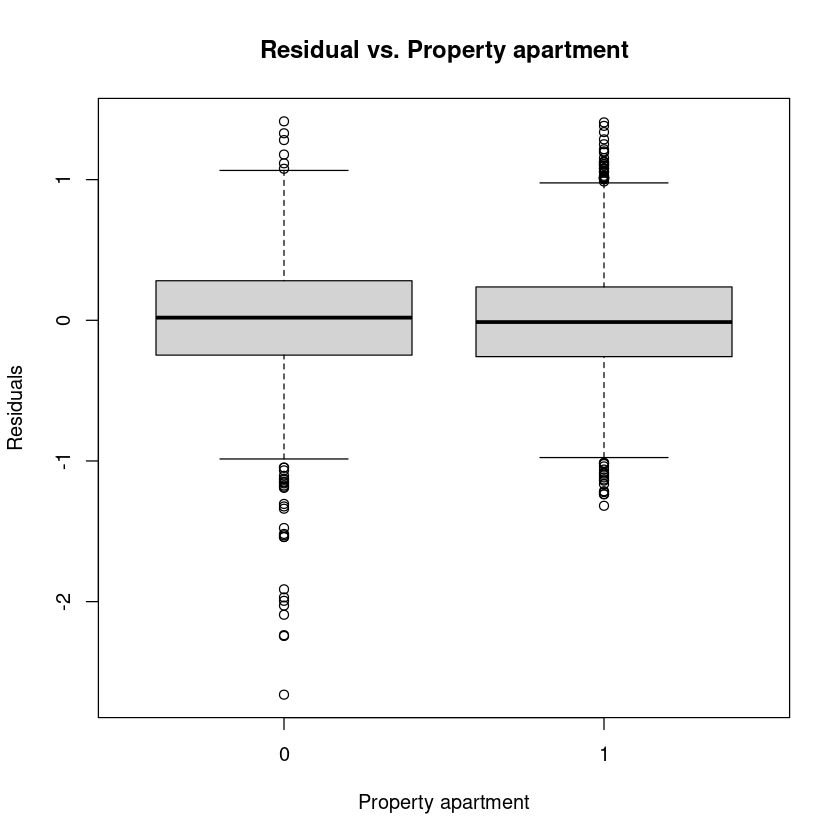

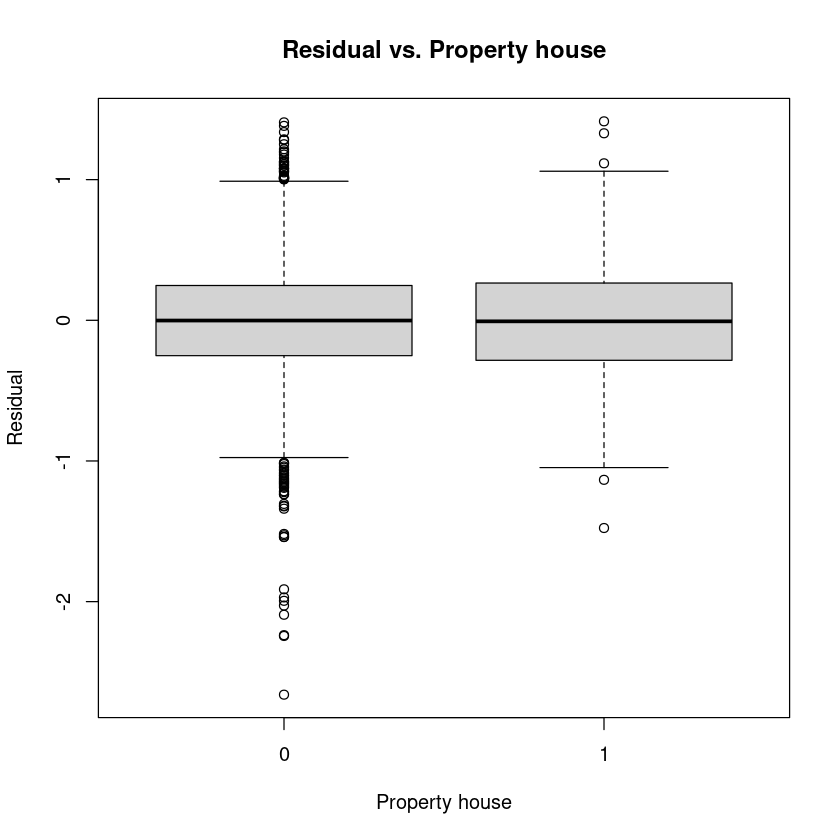

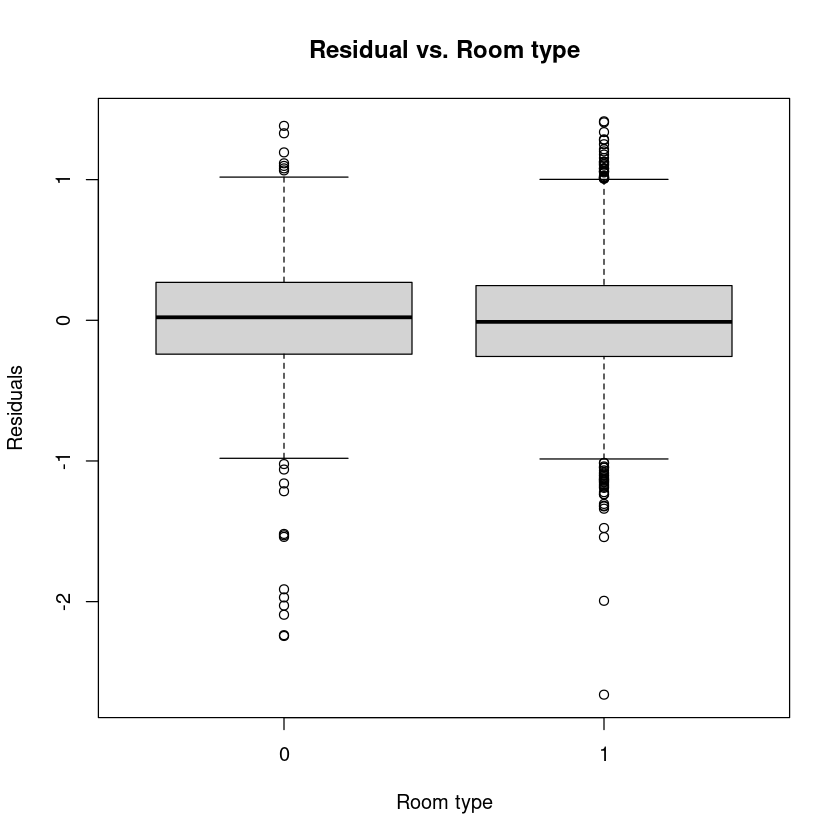

In [126]:
# Scatterplots
# Residual vs. Review ratings
plot(x=review_scores_rating, y=e_hat2, main="Residual vs. Review ratings", ylab="Residuals", xlab="Review ratings")

# Residual vs. Minimum nights
plot(x=minimum_nights, y=e_hat2, main="Residual vs. Minimum nights", ylab="Residuals", xlab="Minimum nights")

# Residual vs. Accommodates
plot(x=accommodates, y=e_hat2, main="Residual vs. Accommodates", ylab="Residuals", xlab="Accommodates")

# Boxplots
# Residual vs. Property apartment
boxplot(e_hat2 ~ property_apmt , main="Residual vs. Property apartment", ylab="Residuals", xlab="Property apartment")

# Residual vs. Property house
boxplot(e_hat2 ~ property_house, main="Residual vs. Property house", ylab="Residual", xlab="Property house")

# Residual vs. Room type
boxplot(e_hat2 ~ room_type, main="Residual vs. Room type", ylab="Residuals", xlab="Room type")

Observations: The fanning pattern from before seems to be much better. However there is still a clustering of points.